**Importing Libraries**

In [1]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

from sklearn.svm import SVC # Support Vector Machines
from sklearn.tree import DecisionTreeClassifier # Decision Tree
from sklearn.ensemble import RandomForestClassifier # Random Forest
from sklearn.neighbors import KNeighborsClassifier #K-nearest neighbour
from sklearn.linear_model import LogisticRegression # Logistic Regression

from sklearn.metrics import accuracy_score,classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

import warnings
warnings.filterwarnings("ignore")

**Loading Dataset**

In [2]:
pred_mnt = pd.read_csv("predictive_maintenance.csv")

In [3]:
pred_mnt

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,No Failure
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,No Failure
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,No Failure
3,4,L47183,L,298.2,308.6,1433,39.5,7,0,No Failure
4,5,L47184,L,298.2,308.7,1408,40.0,9,0,No Failure
...,...,...,...,...,...,...,...,...,...,...
9995,9996,M24855,M,298.8,308.4,1604,29.5,14,0,No Failure
9996,9997,H39410,H,298.9,308.4,1632,31.8,17,0,No Failure
9997,9998,M24857,M,299.0,308.6,1645,33.4,22,0,No Failure
9998,9999,H39412,H,299.0,308.7,1408,48.5,25,0,No Failure


# **Exploratory Data Analysis**

In [4]:
pred_mnt.head()

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,No Failure
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,No Failure
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,No Failure
3,4,L47183,L,298.2,308.6,1433,39.5,7,0,No Failure
4,5,L47184,L,298.2,308.7,1408,40.0,9,0,No Failure


In [5]:
pred_mnt.tail()

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type
9995,9996,M24855,M,298.8,308.4,1604,29.5,14,0,No Failure
9996,9997,H39410,H,298.9,308.4,1632,31.8,17,0,No Failure
9997,9998,M24857,M,299.0,308.6,1645,33.4,22,0,No Failure
9998,9999,H39412,H,299.0,308.7,1408,48.5,25,0,No Failure
9999,10000,M24859,M,299.0,308.7,1500,40.2,30,0,No Failure


In [6]:
pred_mnt.describe()

,UDI,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,5000.50000,300.004930,310.005560,1538.776100,39.986910,107.951000,0.033900
std,2886.89568,2.000259,1.483734,179.284096,9.968934,63.654147,0.180981
min,1.00000,295.300000,305.700000,1168.000000,3.800000,0.000000,0.000000
25%,2500.75000,298.300000,308.800000,1423.000000,33.200000,53.000000,0.000000
50%,5000.50000,300.100000,310.100000,1503.000000,40.100000,108.000000,0.000000
75%,7500.25000,301.500000,311.100000,1612.000000,46.800000,162.000000,0.000000
max,10000.00000,304.500000,313.800000,2886.000000,76.600000,253.000000,1.000000


In [7]:
pred_mnt.describe(include='all')

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type
count,10000.00000,10000,10000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000
unique,NaN,10000,3,NaN,NaN,NaN,NaN,NaN,NaN,6
top,NaN,M14860,L,NaN,NaN,NaN,NaN,NaN,NaN,No Failure
freq,NaN,1,6000,NaN,NaN,NaN,NaN,NaN,NaN,9652
mean,5000.50000,NaN,NaN,300.004930,310.005560,1538.776100,39.986910,107.951000,0.033900,NaN
std,2886.89568,NaN,NaN,2.000259,1.483734,179.284096,9.968934,63.654147,0.180981,NaN
min,1.00000,NaN,NaN,295.300000,305.700000,1168.000000,3.800000,0.000000,0.000000,NaN
25%,2500.75000,NaN,NaN,298.300000,308.800000,1423.000000,33.200000,53.000000,0.000000,NaN
50%,5000.50000,NaN,NaN,300.100000,310.100000,1503.000000,40.100000,108.000000,0.000000,NaN
75%,7500.25000,NaN,NaN,301.500000,311.100000,1612.000000,46.800000,162.000000,0.000000,NaN


**Checking info, Data types and null values**

In [8]:
pred_mnt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   UDI                      10000 non-null  int64  
 1   Product ID               10000 non-null  object 
 2   Type                     10000 non-null  object 
 3   Air temperature [K]      10000 non-null  float64
 4   Process temperature [K]  10000 non-null  float64
 5   Rotational speed [rpm]   10000 non-null  int64  
 6   Torque [Nm]              10000 non-null  float64
 7   Tool wear [min]          10000 non-null  int64  
 8   Target                   10000 non-null  int64  
 9   Failure Type             10000 non-null  object 
dtypes: float64(3), int64(4), object(3)
memory usage: 781.4+ KB


In [9]:
pred_mnt.dtypes

UDI                          int64
Product ID                  object
Type                        object
Air temperature [K]        float64
Process temperature [K]    float64
Rotational speed [rpm]       int64
Torque [Nm]                float64
Tool wear [min]              int64
Target                       int64
Failure Type                object
dtype: object

# **Data Cleaning and Visualisation**

In [10]:
pred_mnt.isnull()

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type
0,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...
9995,False,False,False,False,False,False,False,False,False,False
9996,False,False,False,False,False,False,False,False,False,False
9997,False,False,False,False,False,False,False,False,False,False
9998,False,False,False,False,False,False,False,False,False,False


In [11]:
pred_mnt.isnull().sum()

UDI                        0
Product ID                 0
Type                       0
Air temperature [K]        0
Process temperature [K]    0
Rotational speed [rpm]     0
Torque [Nm]                0
Tool wear [min]            0
Target                     0
Failure Type               0
dtype: int64

**Checking duplicates**

In [12]:
pred_mnt.duplicated().sum()

0

In [13]:
# Dropping unnecessary columns (UDI and Product ID)
new_df = pred_mnt.drop(pred_mnt.columns[:2], axis=1, inplace=False)
new_df

,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type
0,M,298.1,308.6,1551,42.8,0,0,No Failure
1,L,298.2,308.7,1408,46.3,3,0,No Failure
2,L,298.1,308.5,1498,49.4,5,0,No Failure
3,L,298.2,308.6,1433,39.5,7,0,No Failure
4,L,298.2,308.7,1408,40.0,9,0,No Failure
...,...,...,...,...,...,...,...,...
9995,M,298.8,308.4,1604,29.5,14,0,No Failure
9996,H,298.9,308.4,1632,31.8,17,0,No Failure
9997,M,299.0,308.6,1645,33.4,22,0,No Failure
9998,H,299.0,308.7,1408,48.5,25,0,No Failure


In [14]:
# Identify categorical columns
cat_cols = new_df.select_dtypes(include='O').columns.tolist()

In [15]:
# Value counts for categorical columns
for col in cat_cols:
    print(new_df[col].value_counts())

Type
L    6000
M    2997
H    1003
Name: count, dtype: int64
Failure Type
No Failure                  9652
Heat Dissipation Failure     112
Power Failure                 95
Overstrain Failure            78
Tool Wear Failure             45
Random Failures               18
Name: count, dtype: int64


**Label encoding:- Converting categorical data into numerical data**

*Converting 'Type':{
        'H' : 1,
        'M' : 2,
        'L' : 3
}*

In [16]:
# Custom mapping for the 'Type' column
type_mapping = {'H': 1, 'M': 2, 'L': 3}

# Apply the custom mapping to the 'Type' column
new_df['Type'] = new_df['Type'].map(type_mapping)

print("DataFrame with custom label encoding for 'Type' column:")
print(new_df.head())

# Display the category mapping for 'Type' column
print("\nMapping for column 'Type':")
for original_val, encoded_val in type_mapping.items():
    print(f"{encoded_val}: {original_val}")

DataFrame with custom label encoding for 'Type' column:
   Type  Air temperature [K]  Process temperature [K]  Rotational speed [rpm]  \
0     2                298.1                    308.6                    1551   
1     3                298.2                    308.7                    1408   
2     3                298.1                    308.5                    1498   
3     3                298.2                    308.6                    1433   
4     3                298.2                    308.7                    1408   

   Torque [Nm]  Tool wear [min]  Target Failure Type  
0         42.8                0       0   No Failure  
1         46.3                3       0   No Failure  
2         49.4                5       0   No Failure  
3         39.5                7       0   No Failure  
4         40.0                9       0   No Failure  

Mapping for column 'Type':
1: H
2: M
3: L


*Converting 'Feature':{
        'No Failure': 0,
    'Heat Dissipation Failure': 1,
    'Power Failure': 2,
    'Overstrain Failure': 3,
    'Tool Wear Failure': 4,
    'Random Failures': 5
}*

In [17]:
failure_mapping = {
    'No Failure': 0,
    'Heat Dissipation Failure': 1,
    'Power Failure': 2,
    'Overstrain Failure': 3,
    'Tool Wear Failure': 4,
    'Random Failures': 5
}

# Apply the custom mapping to the 'Failure Type' column
new_df['Failure Type'] = new_df['Failure Type'].map(failure_mapping)

print("DataFrame with custom label encoding for 'Type' column:")
print(new_df.head())

# Display the category mapping for 'Type' column
print("\nMapping for column 'Failure Type':")
for original_val, encoded_val in failure_mapping.items():
    print(f"{encoded_val}: {original_val}")

DataFrame with custom label encoding for 'Type' column:
   Type  Air temperature [K]  Process temperature [K]  Rotational speed [rpm]  \
0     2                298.1                    308.6                    1551   
1     3                298.2                    308.7                    1408   
2     3                298.1                    308.5                    1498   
3     3                298.2                    308.6                    1433   
4     3                298.2                    308.7                    1408   

   Torque [Nm]  Tool wear [min]  Target  Failure Type  
0         42.8                0       0             0  
1         46.3                3       0             0  
2         49.4                5       0             0  
3         39.5                7       0             0  
4         40.0                9       0             0  

Mapping for column 'Failure Type':
0: No Failure
1: Heat Dissipation Failure
2: Power Failure
3: Overstrain Failure
4: T

**Converting temperature in centigrate from Kelvin [1 K = -272.15 °C ]**

In [18]:
new_df["Air temperature [K]"] = new_df["Air temperature [K]"] - 272.15
new_df["Process temperature [K]"] = new_df["Process temperature [K]"] - 272.15
# Renaming temperature in Centigrate(°C) from Kelvin (K)
new_df.rename(columns={"Air temperature [K]" : "Air temperature [°C]","Process temperature [K]" : "Process temperature [°C]"}, inplace=True)

**Creating 'Temperature difference' between 'Process temperature' and 'Air temperature'**

In [19]:
new_df["Temperature difference [°C]"] = new_df["Process temperature [°C]"] - new_df["Air temperature [°C]"]
new_df.sample(5)

,Type,Air temperature [°C],Process temperature [°C],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type,Temperature difference [°C]
1020,3,24.15,35.15,1372,57.7,33,0,0,11.0
8376,3,26.65,37.65,1334,49.3,42,0,0,11.0
1394,3,26.95,38.25,1527,44.0,149,0,0,11.3
2010,3,26.45,36.15,1278,60.5,32,0,0,9.7
7973,3,28.95,40.15,1682,29.7,83,0,0,11.2


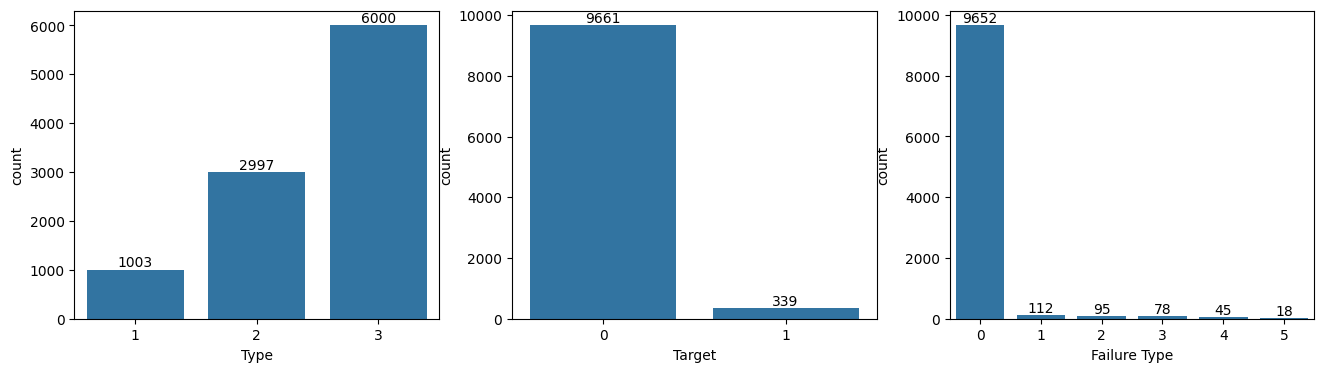

In [20]:
ax = plt.figure(figsize=(16,4))

for idx, feature in enumerate(['Type','Target','Failure Type']):

    ax = plt.subplot(1, 3, 1+idx)
    ax = sns.countplot(x=feature, data=new_df)
    ax.bar_label(ax.containers[0])

**From the visualisation, we can clearly see that count of 'Failure Type = 0' and 'Target = 0'.**

**Hence we will delete those rows.**

In [21]:
df_ = new_df[(new_df['Failure Type']==0) & (new_df['Target']==1)]
df_

,Type,Air temperature [°C],Process temperature [°C],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type,Temperature difference [°C]
1437,1,26.65,37.75,1439,45.2,40,1,0,11.1
2749,2,27.55,37.05,1685,28.9,179,1,0,9.5
4044,2,29.75,38.75,1419,47.7,20,1,0,9.0
4684,2,31.45,39.65,1421,44.8,101,1,0,8.2
5536,2,30.15,39.65,1363,54.0,119,1,0,9.5
5941,3,28.45,38.55,1438,48.5,78,1,0,10.1
6478,3,28.35,37.65,1663,29.1,145,1,0,9.3
8506,3,26.25,37.45,1710,27.3,163,1,0,11.2
9015,3,25.05,35.95,1431,49.7,210,1,0,10.9


In [22]:
df_.shape

(9, 9)

In [23]:
merged_df = new_df.merge(df_, indicator=True, how='outer')
new_df = merged_df[merged_df['_merge'] == 'left_only'].drop('_merge', axis=1)
new_df.shape

(9991, 9)

**We will also check for 'Failure type != 0' and 'Target == 0'**

In [24]:
df_ = new_df[((new_df['Failure Type'] != 0)) & (new_df['Target'] == 0)]
df_

,Type,Air temperature [°C],Process temperature [°C],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type,Temperature difference [°C]
275,1,26.25,35.55,1626,31.1,166,0,5,9.3
599,1,28.25,39.75,1438,46.7,41,0,5,11.5
780,1,29.45,38.35,1602,32.3,2,0,5,8.9
920,1,30.75,40.35,1357,55.0,12,0,5,9.6
1140,2,24.85,36.15,1399,46.4,132,0,5,11.3
2475,2,27.95,37.05,1687,27.7,95,0,5,9.1
5727,3,26.45,37.65,1505,45.7,144,0,5,11.2
6436,3,27.15,36.85,1447,50.4,140,0,5,9.7
6625,3,27.45,37.35,1570,35.5,189,0,5,9.9
7262,3,28.15,39.55,1545,43.5,160,0,5,11.4


**As we can see there are rows with 'Target == 0' and 'Failure Type != 0'.**

**Hence we will delete those rows**

In [25]:
merged_df = new_df.merge(df_, indicator=True, how='outer')
new_df = merged_df[merged_df['_merge'] == 'left_only'].drop('_merge', axis=1)
new_df.reset_index(drop=True, inplace=True)
new_df.shape

(9973, 9)

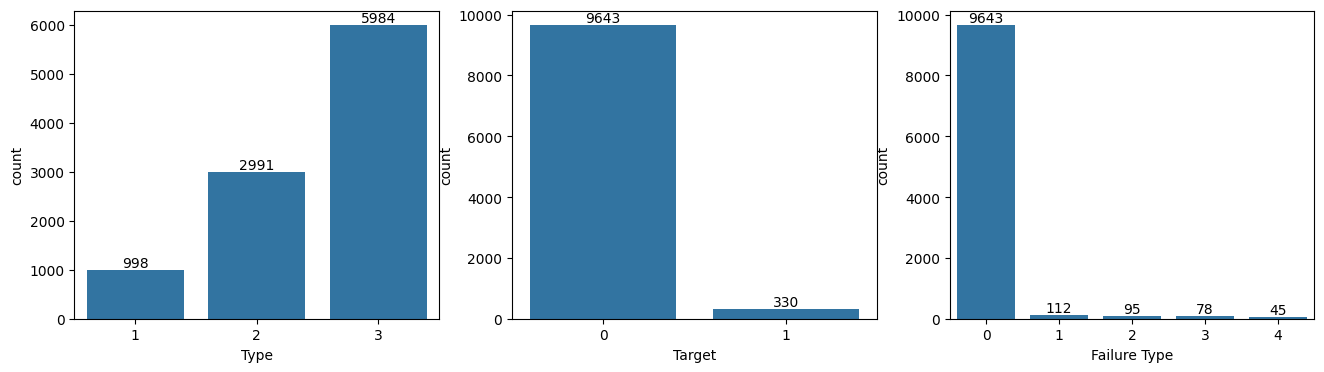

In [26]:
ax = plt.figure(figsize=(16,4))

for idx, feature in enumerate(['Type', 'Target','Failure Type']):

    ax = plt.subplot(1, 3, 1+idx)
    ax = sns.countplot(x=feature, data = new_df)
    ax.bar_label(ax.containers[0])

**Temperature graph**

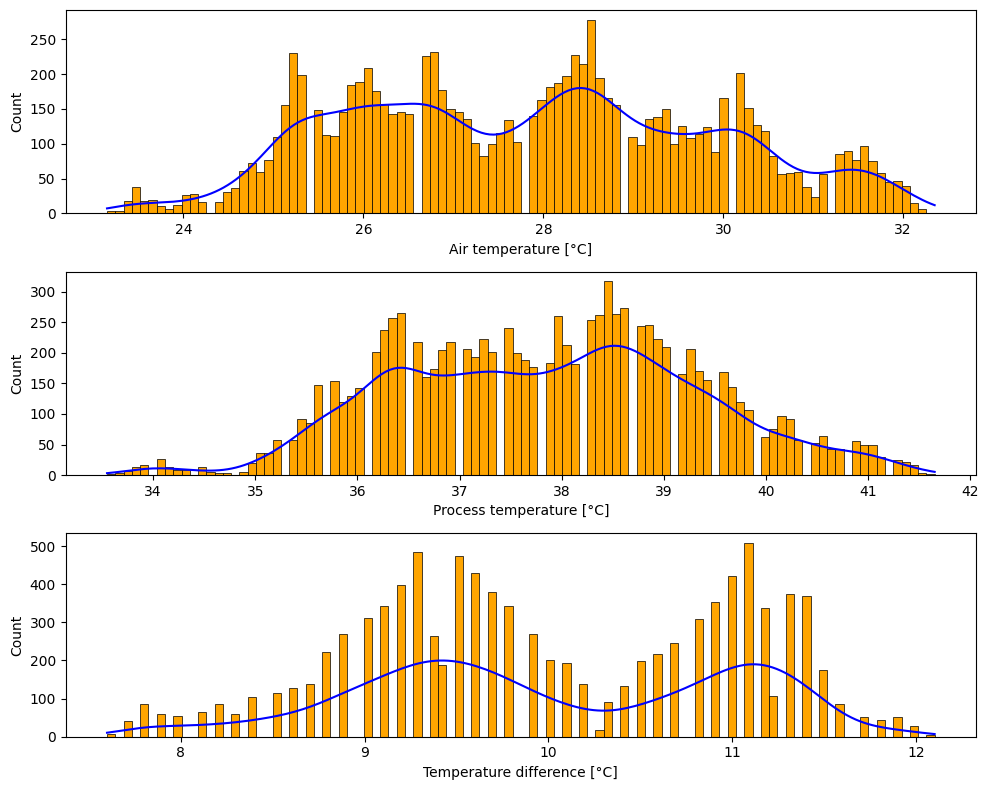

In [27]:
figure, axes = plt.subplots(3, 1, figsize=(10, 8))

for idx, col in enumerate(["Air temperature [°C]", "Process temperature [°C]", "Temperature difference [°C]"]):
    sns.histplot(data = new_df, x=col, kde=True, bins = 100,color = "blue", facecolor = "orange", ax=axes[idx])

plt.tight_layout()
plt.show()

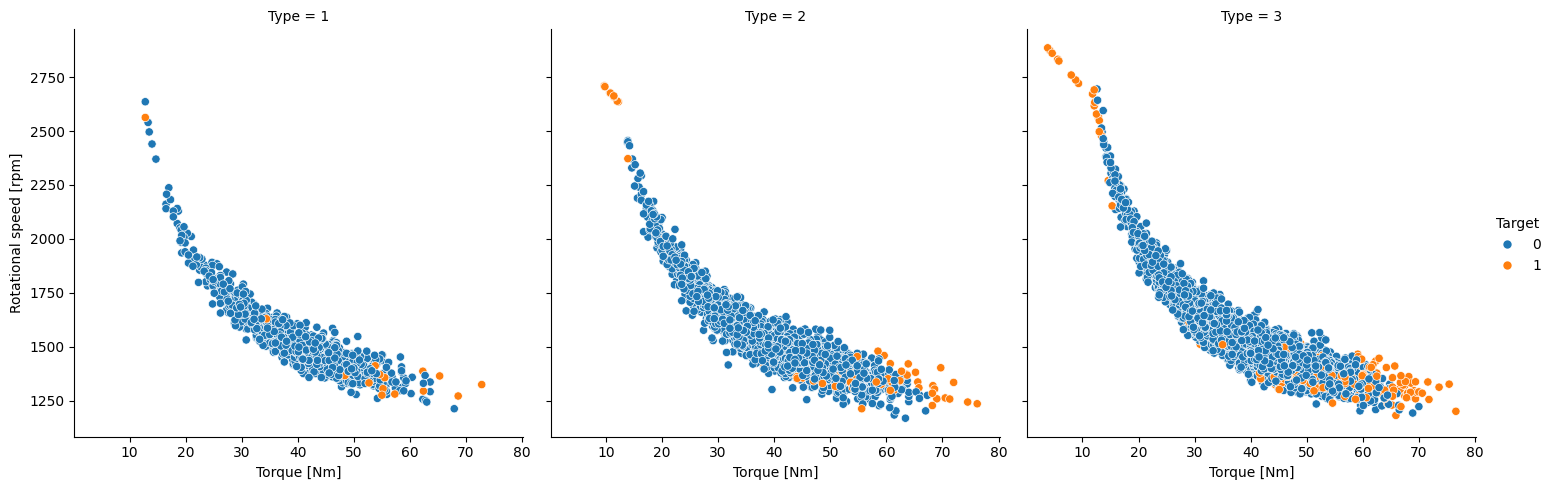

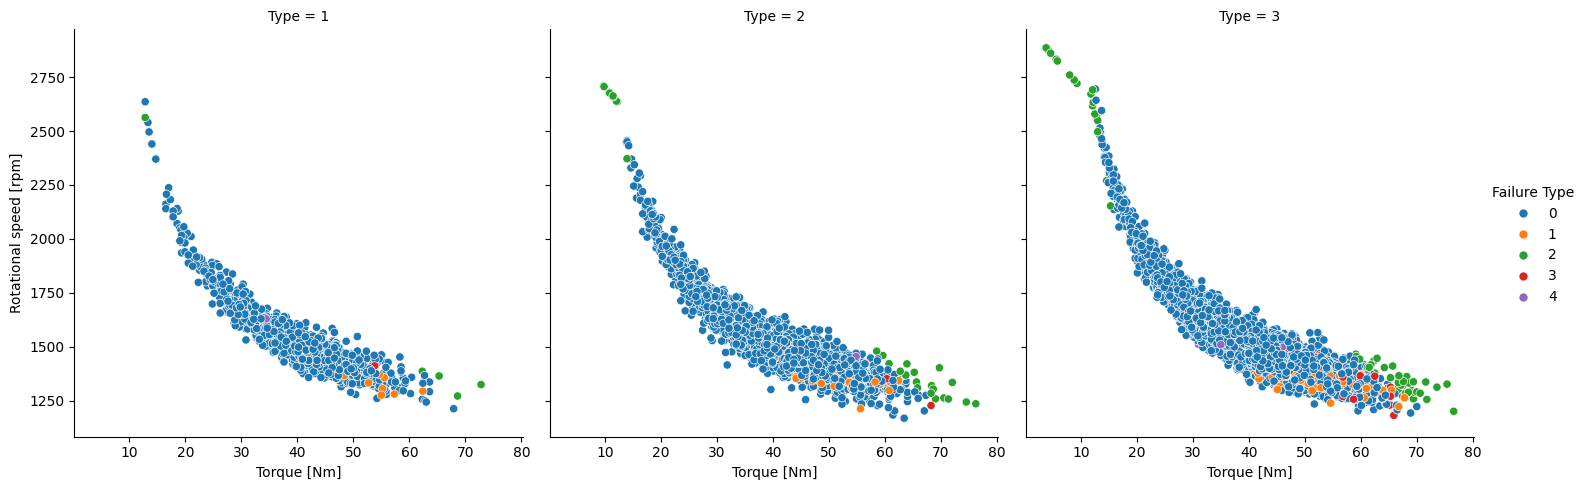

In [28]:
for hue_param in ['Target', 'Failure Type']:
    sns.relplot(data = new_df, x="Torque [Nm]", y="Rotational speed [rpm]", hue=hue_param, col="Type", palette='tab10')
    plt.show()

# **Feature Selection**

Visualise the correlation between the 'Failure Type' and other columns

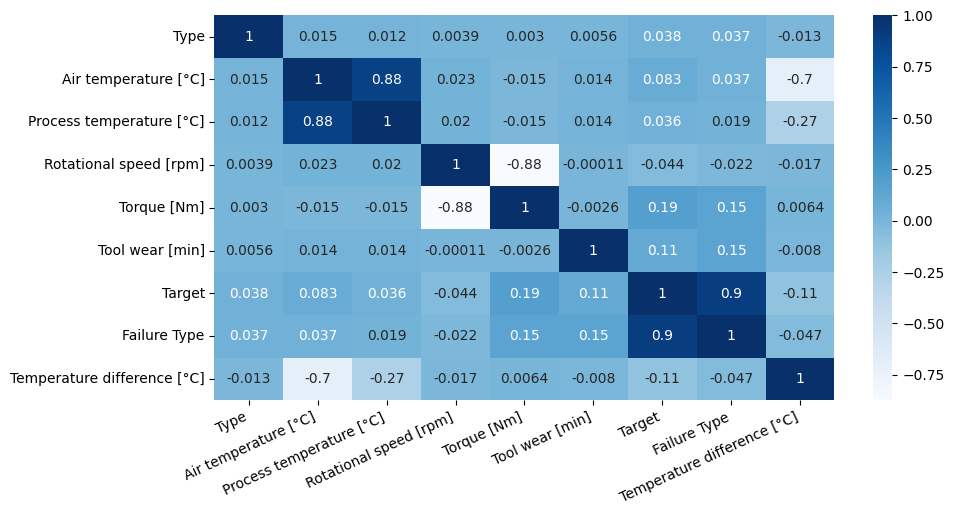

In [29]:
plt.figure(figsize=(10, 5))
sns.heatmap(new_df.corr(), annot=True, cmap="Blues")
plt.xticks(rotation=25, ha="right")
plt.show()

**Choosing Independent and Dependent Variables**

In [30]:
# Preparing data for model training
x = new_df.drop(['Target', 'Failure Type'], axis=1)
y = new_df['Failure Type']

In [31]:
x.sample(10)

,Type,Air temperature [°C],Process temperature [°C],Rotational speed [rpm],Torque [Nm],Tool wear [min],Temperature difference [°C]
8210,3,29.05,38.45,1811,24.0,84,9.4
5054,3,25.85,35.65,1622,33.3,121,9.8
20,1,24.25,35.35,1556,38.0,62,11.1
2565,2,28.05,39.55,1597,39.5,68,11.5
5157,3,25.95,35.65,1432,49.8,198,9.7
3375,2,29.85,37.55,1386,62.7,142,7.7
1755,2,26.25,35.85,1416,38.2,198,9.6
7692,3,28.55,38.05,1348,54.8,50,9.5
2967,2,28.75,38.15,1416,50.9,152,9.4
3696,2,30.55,39.85,1652,31.0,81,9.3


**Splitting data into training and testing set**

In [32]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=21)
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((7978, 7), (1995, 7), (7978,), (1995,))

In [33]:
print('The train classes:', y_train.value_counts())
print()
print('The test classes:', y_test.value_counts())

The train classes: Failure Type
0    7700
1     102
2      79
3      59
4      38
Name: count, dtype: int64

The test classes: Failure Type
0    1943
3      19
2      16
1      10
4       7
Name: count, dtype: int64


# **Modeling and Model Selection**

**Logistic Regression**

Training Accuracy    : 96.58 %
Model Accuracy Score : 97.69 %
--------------------------------------------------------
Classification_Report: 
               precision    recall  f1-score   support

           0       0.98      1.00      0.99      1943
           1       0.00      0.00      0.00        10
           2       0.67      0.25      0.36        16
           3       0.86      0.32      0.46        19
           4       0.25      0.14      0.18         7

    accuracy                           0.98      1995
   macro avg       0.55      0.34      0.40      1995
weighted avg       0.97      0.98      0.97      1995

--------------------------------------------------------


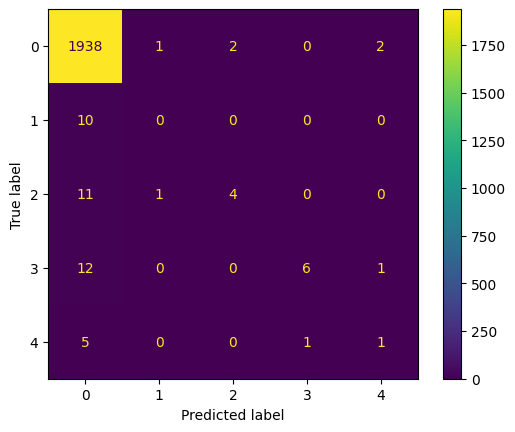

In [34]:
logreg = LogisticRegression()
logreg.fit(x_train, y_train)
y_pred_lr = logreg.predict(x_test)

log_train = round(logreg.score(x_train, y_train) * 100, 2)
log_accuracy = round(accuracy_score(y_pred_lr, y_test) * 100, 2)

print("Training Accuracy    :",log_train ,"%")
print("Model Accuracy Score :",log_accuracy ,"%")
print("\033[1m--------------------------------------------------------\033[0m")
print("Classification_Report: \n",classification_report(y_test,y_pred_lr))
print("\033[1m--------------------------------------------------------\033[0m")

disp = ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred_lr))
disp.plot()

**Decision Tree Classifier**

Training Accuracy    : 100.0 %
Model Accuracy Score : 98.4 %
--------------------------------------------------------
Classification_Report: 
               precision    recall  f1-score   support

           0       1.00      0.99      0.99      1943
           1       0.83      1.00      0.91        10
           2       0.78      0.88      0.82        16
           3       0.74      0.74      0.74        19
           4       0.08      0.14      0.10         7

    accuracy                           0.98      1995
   macro avg       0.68      0.75      0.71      1995
weighted avg       0.99      0.98      0.99      1995

--------------------------------------------------------


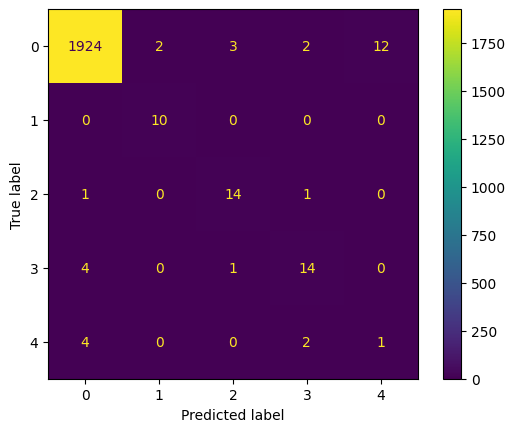

In [35]:
decision = DecisionTreeClassifier()
decision.fit(x_train, y_train)
y_pred_dec = decision.predict(x_test)

decision_train = round(decision.score(x_train, y_train) * 100, 2)
decision_accuracy = round(accuracy_score(y_pred_dec, y_test) * 100, 2)

print("Training Accuracy    :",decision_train ,"%")
print("Model Accuracy Score :",decision_accuracy ,"%")
print("\033[1m--------------------------------------------------------\033[0m")
print("Classification_Report: \n",classification_report(y_test,y_pred_dec))
print("\033[1m--------------------------------------------------------\033[0m")

disp = ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred_dec))
disp.plot()

**K-nearest Neighbour**

Training Accuracy    : 97.08 %
Model Accuracy Score : 97.89 %
--------------------------------------------------------
Classification_Report: 
               precision    recall  f1-score   support

           0       0.98      1.00      0.99      1943
           1       0.00      0.00      0.00        10
           2       0.88      0.44      0.58        16
           3       0.88      0.37      0.52        19
           4       0.00      0.00      0.00         7

    accuracy                           0.98      1995
   macro avg       0.55      0.36      0.42      1995
weighted avg       0.97      0.98      0.97      1995

--------------------------------------------------------


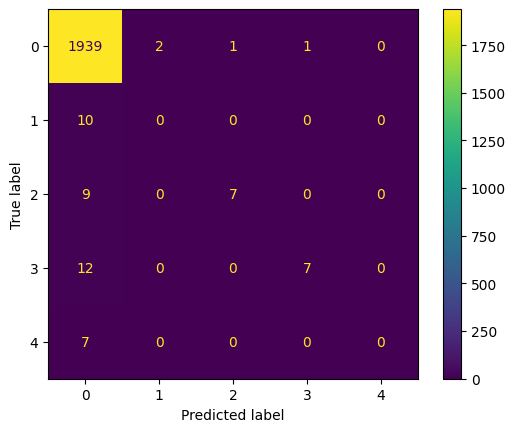

In [36]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(x_train, y_train)
y_pred_knn = knn.predict(x_test)

knn_train = round(knn.score(x_train, y_train) * 100, 2)
knn_accuracy = round(accuracy_score(y_pred_knn, y_test) * 100, 2)

print("Training Accuracy    :",knn_train ,"%")
print("Model Accuracy Score :",knn_accuracy ,"%")
print("\033[1m--------------------------------------------------------\033[0m")
print("Classification_Report: \n",classification_report(y_test,y_pred_knn))
print("\033[1m--------------------------------------------------------\033[0m")

disp = ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred_knn))
disp.plot()

**Random Forest Classifier**

Training Accuracy    : 100.0 %
Model Accuracy Score : 98.95 %
--------------------------------------------------------
Classification_Report: 
               precision    recall  f1-score   support

           0       0.99      1.00      0.99      1943
           1       0.91      1.00      0.95        10
           2       0.82      0.88      0.85        16
           3       1.00      0.58      0.73        19
           4       0.00      0.00      0.00         7

    accuracy                           0.99      1995
   macro avg       0.74      0.69      0.71      1995
weighted avg       0.99      0.99      0.99      1995

--------------------------------------------------------


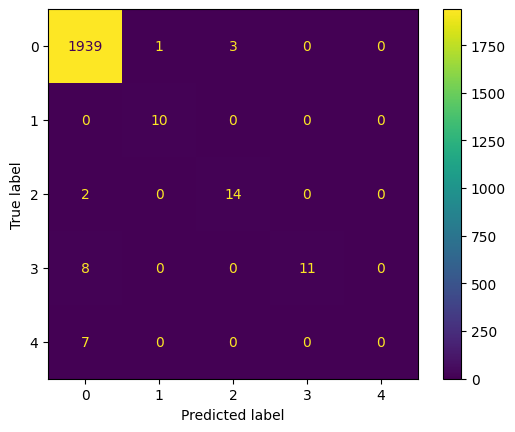

In [37]:
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(x_train, y_train)
y_pred_rf = random_forest.predict(x_test)

random_forest_train = round(random_forest.score(x_train, y_train) * 100, 2)
random_forest_accuracy = round(accuracy_score(y_pred_rf, y_test) * 100, 2)

print("Training Accuracy    :",random_forest_train ,"%")
print("Model Accuracy Score :",random_forest_accuracy ,"%")
print("\033[1m--------------------------------------------------------\033[0m")
print("Classification_Report: \n",classification_report(y_test,y_pred_rf))
print("\033[1m--------------------------------------------------------\033[0m")

disp = ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred_rf))
disp.plot()

**Support Vector Machine**

Training Accuracy    : 96.55 %
Model Accuracy Score : 97.39 %
--------------------------------------------------------
Classification_Report: 
               precision    recall  f1-score   support

           0       0.97      1.00      0.99      1943
           1       0.00      0.00      0.00        10
           2       0.00      0.00      0.00        16
           3       0.00      0.00      0.00        19
           4       0.00      0.00      0.00         7

    accuracy                           0.97      1995
   macro avg       0.19      0.20      0.20      1995
weighted avg       0.95      0.97      0.96      1995

--------------------------------------------------------


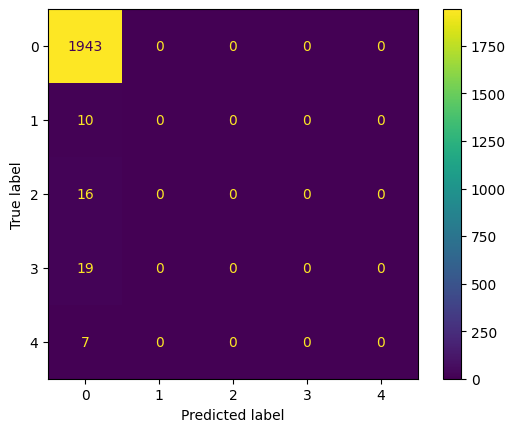

In [38]:
svc = SVC()
svc.fit(x_train, y_train)
y_pred_svc = svc.predict(x_test)

svc_train = round(svc.score(x_train, y_train) * 100, 2)
svc_accuracy = round(accuracy_score(y_pred_svc, y_test) * 100, 2)

print("Training Accuracy    :",svc_train ,"%")
print("Model Accuracy Score :",svc_accuracy ,"%")
print("\033[1m--------------------------------------------------------\033[0m")
print("Classification_Report: \n",classification_report(y_test,y_pred_svc))
print("\033[1m--------------------------------------------------------\033[0m")

disp = ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred_svc))
disp.plot()

# **Model Evaluation**

In [39]:
models = pd.DataFrame({
    'Model': [
        'Support Vector Machines', 'Logistic Regression', 'Random Forest',
        'Decision Tree', 'K-nearest neighbour'
    ],
    
    'Training Accuracy':
    [log_train, svc_train, decision_train, random_forest_train, knn_train],
    
    'Model Accuracy Score': [
        log_accuracy, svc_accuracy, decision_accuracy, random_forest_accuracy, knn_accuracy
    ]
})

In [40]:
models.sort_values(by='Model Accuracy Score', ascending=False)

,Model,Training Accuracy,Model Accuracy Score
3,Decision Tree,100.00,98.95
2,Random Forest,100.00,98.40
4,K-nearest neighbour,97.08,97.89
0,Support Vector Machines,96.58,97.69
1,Logistic Regression,96.55,97.39


In [41]:
prediction1 = decision.predict(x_test)
print(prediction1)

[0 0 0 ... 0 0 0]


In [42]:
cross_checking = pd.DataFrame({'Actual' : y_test , 'Predicted' : prediction1})
cross_checking.sample(10)

,Actual,Predicted
7576,0,0
8183,0,0
3690,0,0
5064,0,0
4971,0,0
4262,0,0
7470,0,0
5524,0,0
1688,0,0
187,0,0


**Hence, Decision Tree classifier worked best for predicting the maintenance.**